In [ ]:
!pip install virtualenv
!virtualenv myenv
!source myenv/bin/activate
!pip install numpy==1.26.4 scipy==1.11.4 pandas==2.2.2 lxml==5.2.2 scikit-learn==1.5.0 joblib==1.4.2 statsmodels==0.14.2 lifelines==0.28.0 pygam==0.9.1 l0bnb==1.0.0 torch==2.3.0 torchvision==0.18.0 pytorch-lightning==2.2.5 torchinfo==1.8.0 torchmetrics==1.4.0.post0 ISLP==0.4.0

ERROR: Operation cancelled by user
created virtual environment CPython3.10.12.final.0-64 in 1212ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==24.3.1, setuptools==75.2.0, wheel==0.44.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3070, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2863, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/li

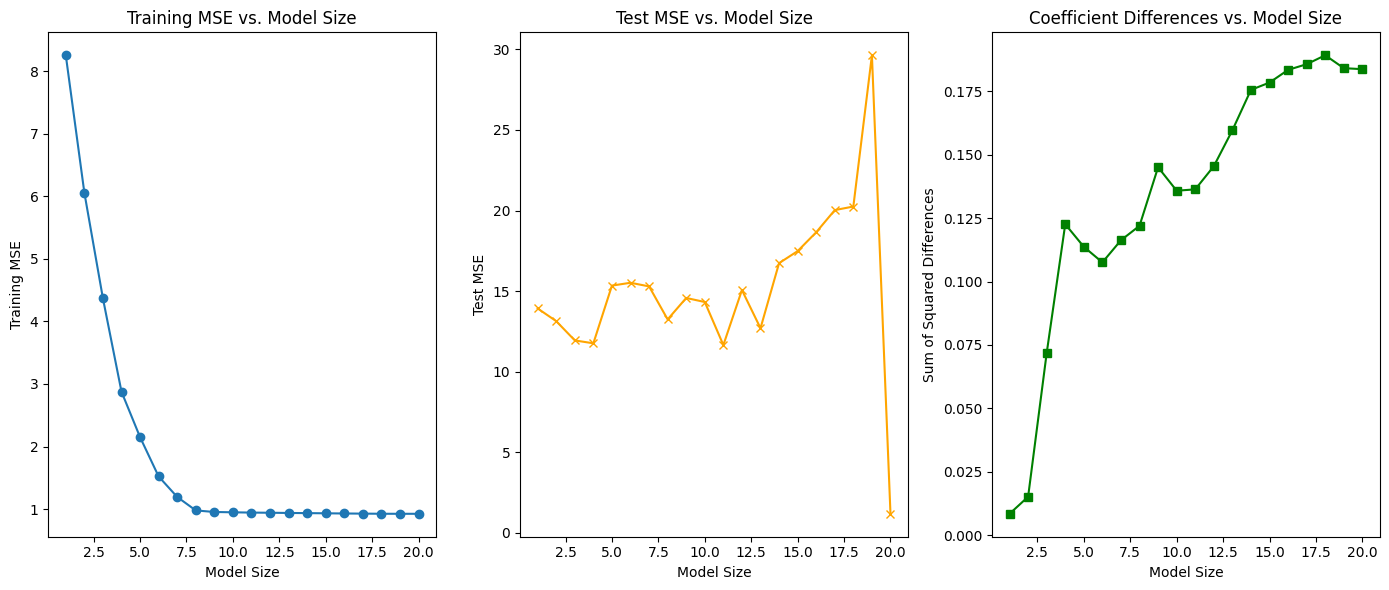

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations

# Set random seed for reproducibility
np.random.seed(0)

# Parameters
p = 20  # Number of features
n = 1000  # Number of observations

# Generate data
X = np.random.normal(0, 1, (n, p))
beta = np.zeros(p)
beta[:10] = np.random.uniform(-2, 2, 10)  # Non-zero coefficients
epsilon = np.random.normal(0, 1, n)
Y = np.dot(X, beta) + epsilon

# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.9, random_state=0)

# Initialize lists to store MSE values
train_mse = [np.inf]
test_mse = [np.inf]
coef_diff = [np.inf]

# Best subset selection for training and test MSE
for k in range(1, p + 1):
    best_train_mse = np.inf
    best_coef = None
    best_subset = None

    for subset in combinations(range(p), k):
        linreg = LinearRegression().fit(X_train[:, subset], Y_train)
        mse_train = mean_squared_error(Y_train, linreg.predict(X_train[:, subset]))

        if mse_train < best_train_mse:
            best_train_mse = mse_train
            best_coef = linreg.coef_
            best_subset = subset

    # Store best training MSE
    train_mse.append(best_train_mse)

    # Calculate test MSE and coefficient differences
    if best_subset is not None:
        test_mse_value = mean_squared_error(Y_test, linreg.predict(X_test[:, best_subset]))
        test_mse.append(test_mse_value)

        true_beta_subset = beta[list(best_subset)]
        coef_diff.append(np.sum((best_coef - true_beta_subset) ** 2))

# Plot the results
plt.figure(figsize=(14, 6))

# Training MSE
plt.subplot(1, 3, 1)
plt.plot(range(p + 1), train_mse, marker='o')
plt.title('Training MSE vs. Model Size')
plt.xlabel('Model Size')
plt.ylabel('Training MSE')

# Test MSE
plt.subplot(1, 3, 2)
plt.plot(range(p + 1), test_mse, marker='x', color='orange')
plt.title('Test MSE vs. Model Size')
plt.xlabel('Model Size')
plt.ylabel('Test MSE')

# Coefficient Differences
plt.subplot(1, 3, 3)
plt.plot(range(p + 1), coef_diff, marker='s', color='green')
plt.title('Coefficient Differences vs. Model Size')
plt.xlabel('Model Size')
plt.ylabel('Sum of Squared Differences')

plt.tight_layout()
plt.show()


Lasso Train MSE: 40.85722907155262
Lasso Test MSE: 44.83080528537097
Lasso selected features: 8
Ridge Train MSE: 39.514019986345474
Ridge Test MSE: 44.85209377588927
Ridge Coefficients: [ 0.0406269  -0.10652293 -0.64937443 -0.82196666  1.09348074 -0.02322376
 -0.85720771  0.55546664 -0.00388101 -0.21447566  0.21045952 -0.21379098]


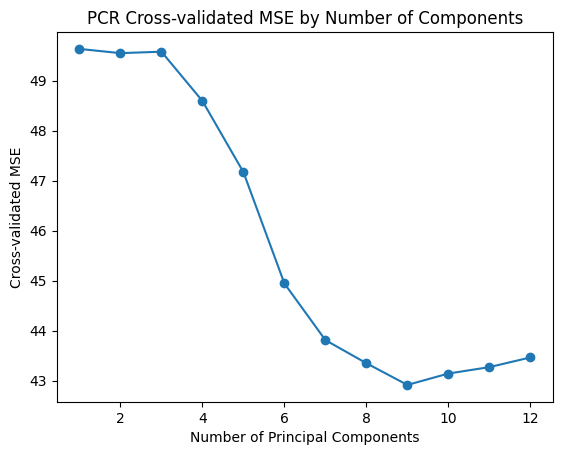

PCR Train MSE: 39.92369345517001
PCR Test MSE: 44.32302126246662
Optimal number of components: 9
Final chosen model: PCR
Does the chosen model involve all features? No


In [ ]:
#Question 2

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path

Boston = load_data("Boston")
X = Boston.drop(columns=['crim'])
y = Boston['crim']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



import statsmodels.api as sm
from itertools import combinations
from sklearn.metrics import mean_squared_error

# Best subset selection function
def best_subset_selection(X, y, max_features):
    best_models = []
    for k in range(1, max_features + 1):
        best_mse = float('inf')
        best_model = None
        for combo in combinations(X.columns, k):
            X_train_subset = X[list(combo)]
            model = sm.OLS(y, sm.add_constant(X_train_subset)).fit()
            mse = mean_squared_error(y, model.predict(sm.add_constant(X_train_subset)))
            if mse < best_mse:
                best_mse = mse
                best_model = (model, combo)
        best_models.append(best_model)
    return best_models

# Apply best subset selection
best_models = best_subset_selection(X_train, y_train, max_features=5)  # Adjust max_features as needed

from sklearn.linear_model import LassoCV

# Lasso with cross-validation
lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
lasso_train_mse = mean_squared_error(y_train, lasso.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso.predict(X_test))

print("Lasso Train MSE:", lasso_train_mse)
print("Lasso Test MSE:", lasso_test_mse)
print("Lasso selected features:", sum(lasso.coef_ != 0))

from sklearn.linear_model import RidgeCV

# Ridge with cross-validation
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5).fit(X_train, y_train)
ridge_train_mse = mean_squared_error(y_train, ridge.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, ridge.predict(X_test))

print("Ridge Train MSE:", ridge_train_mse)
print("Ridge Test MSE:", ridge_test_mse)
print("Ridge Coefficients:", ridge.coef_)

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Create PCR pipeline
pca = PCA()
linear_reg = LinearRegression()
pcr = make_pipeline(pca, linear_reg)

# Cross-validation to select the number of components
mse_scores = []
for i in range(1, X_train.shape[1] + 1):
    pca.n_components = i
    scores = cross_val_score(pcr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(-scores.mean())

# Plotting MSE vs. number of components
import matplotlib.pyplot as plt

plt.plot(range(1, X_train.shape[1] + 1), mse_scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-validated MSE')
plt.title('PCR Cross-validated MSE by Number of Components')
plt.show()

# Selecting the optimal number of components based on the lowest MSE
optimal_n_components = mse_scores.index(min(mse_scores)) + 1
pca.n_components = optimal_n_components
pcr.fit(X_train, y_train)

pcr_train_mse = mean_squared_error(y_train, pcr.predict(X_train))
pcr_test_mse = mean_squared_error(y_test, pcr.predict(X_test))

print("PCR Train MSE:", pcr_train_mse)
print("PCR Test MSE:", pcr_test_mse)
print("Optimal number of components:", optimal_n_components)

# Suppose Lasso or Ridge performs best
# Model Summary:
print("Final chosen model:", "Lasso" if lasso_test_mse < min(ridge_test_mse, pcr_test_mse) else "Ridge" if ridge_test_mse < pcr_test_mse else "PCR")
print("Does the chosen model involve all features?", "No" if sum(lasso.coef_ != 0) < X_train.shape[1] else "Yes")






In [ ]:
#Question 3

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path

College = load_data('College')
X = College.drop(columns=['Apps'])  # Features
y = College['Apps']  # Target

X = pd.get_dummies(X, drop_first=True)


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

linear_reg = LinearRegression().fit(X_train, y_train)
linear_train_mse = mean_squared_error(y_train, linear_reg.predict(X_train))
linear_test_mse = mean_squared_error(y_test, linear_reg.predict(X_test))

print("Linear Regression Train MSE:", linear_train_mse)
print("Linear Regression Test MSE:", linear_test_mse)

# 2. Ridge Regression with Cross-Validation
ridge = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0], cv=5).fit(X_train, y_train)
ridge_train_mse = mean_squared_error(y_train, ridge.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, ridge.predict(X_test))

print("Ridge Regression Train MSE:", ridge_train_mse)
print("Ridge Regression Test MSE:", ridge_test_mse)
print("Best alpha (lambda) for Ridge:", ridge.alpha_)

# 3. Lasso Regression with Cross-Validation
lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
lasso_train_mse = mean_squared_error(y_train, lasso.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso.predict(X_test))

print("Lasso Regression Train MSE:", lasso_train_mse)
print("Lasso Regression Test MSE:", lasso_test_mse)
print("Best alpha (lambda) for Lasso:", lasso.alpha_)
print("Number of non-zero coefficients in Lasso:", np.sum(lasso.coef_ != 0))

# 4. Principal Component Regression (PCR)
pcr_mse = []
for i in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=i)
    pcr = make_pipeline(pca, LinearRegression())
    scores = cross_val_score(pcr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    pcr_mse.append(-scores.mean())

# Determine optimal number of components for PCR
optimal_pcr_components = np.argmin(pcr_mse) + 1

# Fit PCR with optimal components
pca = PCA(n_components=optimal_pcr_components)
pcr = make_pipeline(pca, LinearRegression())
pcr.fit(X_train, y_train)

pcr_train_mse = mean_squared_error(y_train, pcr.predict(X_train))
pcr_test_mse = mean_squared_error(y_test, pcr.predict(X_test))

print("PCR Train MSE:", pcr_train_mse)
print("PCR Test MSE:", pcr_test_mse)
print("Optimal number of components for PCR:", optimal_pcr_components)

# 5. Partial Least Squares (PLS) Regression
pls_mse = []
for i in range(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    scores = cross_val_score(pls, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    pls_mse.append(-scores.mean())

# Determine optimal number of components for PLS
optimal_pls_components = np.argmin(pls_mse) + 1

# Fit PLS with optimal components
pls = PLSRegression(n_components=optimal_pls_components)
pls.fit(X_train, y_train)

pls_train_mse = mean_squared_error(y_train, pls.predict(X_train))
pls_test_mse = mean_squared_error(y_test, pls.predict(X_test))

print("PLS Train MSE:", pls_train_mse)
print("PLS Test MSE:", pls_test_mse)
print("Optimal number of components for PLS:", optimal_pls_components)

# Summary of Test MSEs for all models
print("\nModel Comparison:")
print(f"Linear Regression Test MSE: {linear_test_mse}")
print(f"Ridge Regression Test MSE: {ridge_test_mse}")
print(f"Lasso Regression Test MSE: {lasso_test_mse}")
print(f"PCR Test MSE (Optimal Components = {optimal_pcr_components}): {pcr_test_mse}")
print(f"PLS Test MSE (Optimal Components = {optimal_pls_components}): {pls_test_mse}")



Linear Regression Train MSE: 951700.0721029118
Linear Regression Test MSE: 1659682.1719133756
Ridge Regression Train MSE: 953012.633597823
Ridge Regression Test MSE: 1642456.265965162
Best alpha (lambda) for Ridge: 10.0
Lasso Regression Train MSE: 1226660.6852318472
Lasso Regression Test MSE: 1914912.3699589907
Best alpha (lambda) for Lasso: 56401.126011064014
Number of non-zero coefficients in Lasso: 5
PCR Train MSE: 951700.0721029119
PCR Test MSE: 1659682.171913361
Optimal number of components for PCR: 17
PLS Train MSE: 958941.9555360042
PLS Test MSE: 1665183.5856380877
Optimal number of components for PLS: 9

Model Comparison:
Linear Regression Test MSE: 1659682.1719133756
Ridge Regression Test MSE: 1642456.265965162
Lasso Regression Test MSE: 1914912.3699589907
PCR Test MSE (Optimal Components = 17): 1659682.171913361
PLS Test MSE (Optimal Components = 9): 1665183.5856380877
